# Group project - Data preprocessing and visualization

In [17]:
import pandas as pd
import numpy as np

#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from IPython.display import Image

#Library for building machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [18]:
# pd.set_option("display.max_row", 1000)  # pandas setting to output max 1000 rows 
pd.set_option("display.max_columns", 100) # pandas setting to output max 100 columns 

In [19]:
df = pd.read_excel('MasterData.xlsx', sheet_name='Data')
df

,Date,"Net import/export of electricity - real time data, MWh",Total production capacity used in the solar power forecast,Total production capacity used in the wind power forecast,Electricity production in Finland,Wind power generation - 15 min data,Electricity consumption in Finland,Solar power generation forecast - updated every 15 minutes,Ordered down-regulations from Balancing energy market in Finland,Ordered up-regulations from Balancing energy market in Finland,The sum of the down-regualtion bids in the Balancing energy market,The sum of the up-regulation bids in the balancing energy market,Hourly electricity price (Finnish day-ahead),Power system state - real time data
0,2014-01-01 00,-1831.637247,NaN,NaN,7306.00,NaN,8642.00,NaN,0.00,0.0,-220.0,854.0,28.07,NaN
1,2014-01-01 01,-1515.145211,NaN,NaN,7264.00,NaN,8453.00,NaN,0.00,0.0,-180.0,834.0,28.66,NaN
2,2014-01-01 02,-1340.163301,NaN,NaN,7231.00,NaN,8384.00,NaN,0.00,0.0,-160.0,834.0,28.08,NaN
3,2014-01-01 03,-1189.607325,NaN,NaN,7270.00,NaN,8452.00,NaN,0.00,0.0,-170.0,834.0,27.38,NaN
4,2014-01-01 04,-1152.787662,NaN,NaN,7339.00,NaN,8655.00,NaN,0.00,0.0,-220.0,834.0,26.21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94072,2024-09-24 16,505.246500,1109.3,7763.6,8873.42,3003.60,8451.95,19.0,0.00,0.0,-1314.0,538.0,29.21,1
94073,2024-09-24 17,860.337500,1109.3,7763.6,9508.89,3829.33,8856.11,0.0,-2.08,0.0,-1349.0,658.0,84.10,1
94074,2024-09-24 18,1265.115000,1109.3,7763.6,9595.53,4205.76,8437.06,0.0,-5.00,0.0,-1334.0,764.0,80.01,1
94075,2024-09-24 19,1205.765000,1109.3,7763.6,9388.93,4147.87,8156.39,0.0,-25.00,0.0,-1435.0,766.0,33.42,1


In [20]:
df.isnull().sum() #checking for null values

Date                                                                      0
Net import/export of electricity - real time data, MWh                  130
Total production capacity used in the solar power forecast            10429
Total production capacity used in the wind power forecast             10429
Electricity production in Finland                                      1340
Wind power generation - 15 min data                                    9315
Electricity consumption in Finland                                     1330
Solar power generation forecast - updated every 15 minutes            28514
Ordered down-regulations from Balancing energy market in Finland          0
Ordered up-regulations from Balancing energy market in Finland            0
The sum of the down-regualtion bids in the Balancing energy market        0
The sum of the up-regulation bids in the balancing energy market          0
Hourly electricity price (Finnish day-ahead)                              0
Power system

In [21]:
df.shape #Verify data loaded correctly

(94077, 14)

In [22]:
df.info #Variable types

<bound method DataFrame.info of                 Date  Net import/export of electricity - real time data, MWh  \
0      2014-01-01 00                                       -1831.637247        
1      2014-01-01 01                                       -1515.145211        
2      2014-01-01 02                                       -1340.163301        
3      2014-01-01 03                                       -1189.607325        
4      2014-01-01 04                                       -1152.787662        
...              ...                                                ...        
94072  2024-09-24 16                                         505.246500        
94073  2024-09-24 17                                         860.337500        
94074  2024-09-24 18                                        1265.115000        
94075  2024-09-24 19                                        1205.765000        
94076  2024-09-24 20                                        1267.940000        

       

In [23]:
df.describe () #Statistical summary

,"Net import/export of electricity - real time data, MWh",Total production capacity used in the solar power forecast,Total production capacity used in the wind power forecast,Electricity production in Finland,Wind power generation - 15 min data,Electricity consumption in Finland,Solar power generation forecast - updated every 15 minutes,Ordered down-regulations from Balancing energy market in Finland,Ordered up-regulations from Balancing energy market in Finland,The sum of the down-regualtion bids in the Balancing energy market,The sum of the up-regulation bids in the balancing energy market,Hourly electricity price (Finnish day-ahead)
count,93947.000000,83648.000000,83648.000000,92737.000000,84762.000000,92747.000000,65563.000000,94077.000000,94077.000000,94077.000000,94077.000000,94077.000000
mean,-1691.944990,276.659408,2858.385813,7619.169483,816.569420,9350.248368,51.873874,-23.896059,17.786899,-584.133432,829.883267,52.854578
std,1013.298909,340.340122,1912.201783,1462.452786,848.316148,1541.477638,115.405181,55.919811,49.802746,249.075702,298.317341,64.173451
min,-6184.619996,0.000000,0.000000,3970.000000,-22.930000,5225.000000,0.000000,-829.760000,0.000000,-1793.000000,0.000000,-499.950000
25%,-2315.098306,0.000000,1575.000000,6507.000000,229.000000,8194.000000,0.000000,-19.160000,0.000000,-751.000000,600.000000,25.990000
50%,-1839.644997,180.000000,2017.000000,7542.000000,515.000000,9151.000000,1.200000,0.000000,0.000000,-570.000000,820.000000,36.480000
75%,-1274.463086,377.000000,3788.000000,8620.000000,1134.000000,10427.000000,42.236495,0.000000,0.830000,-395.000000,1049.000000,53.930000
max,4486.179997,1109.300000,7763.600000,14246.000000,6049.899900,15105.000000,855.100000,0.000000,846.000000,0.000000,2245.000000,1896.240000


In [24]:
df.columns = df.columns.str.strip()

In [25]:
df['Date'] = pd.to_datetime(df['Date']) #convert dates to python date format

In [26]:
df_filtered = df[df['Date'] >= '2015-01-01 00:00'] #filter data to start from 2015
df_filtered

,Date,"Net import/export of electricity - real time data, MWh",Total production capacity used in the solar power forecast,Total production capacity used in the wind power forecast,Electricity production in Finland,Wind power generation - 15 min data,Electricity consumption in Finland,Solar power generation forecast - updated every 15 minutes,Ordered down-regulations from Balancing energy market in Finland,Ordered up-regulations from Balancing energy market in Finland,The sum of the down-regualtion bids in the Balancing energy market,The sum of the up-regulation bids in the balancing energy market,Hourly electricity price (Finnish day-ahead),Power system state - real time data
8760,2015-01-01 00:00:00,-2815.924722,NaN,NaN,6751.00,208.00,8893.00,NaN,0.00,67.5,-150.0,1242.0,28.01,1
8761,2015-01-01 01:00:00,-2422.444828,NaN,NaN,6764.00,250.00,8735.00,NaN,0.00,75.0,-150.0,1262.0,27.38,1
8762,2015-01-01 02:00:00,-2141.165799,NaN,NaN,6587.00,264.00,8626.00,NaN,0.00,20.0,-150.0,1302.0,23.37,1
8763,2015-01-01 03:00:00,-1968.590804,NaN,NaN,6601.00,274.00,8674.00,NaN,0.00,0.0,-150.0,1302.0,19.33,1
8764,2015-01-01 04:00:00,-2036.869487,NaN,NaN,6698.00,287.00,8845.00,NaN,0.00,0.0,-150.0,1282.0,17.66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94072,2024-09-24 16:00:00,505.246500,1109.3,7763.6,8873.42,3003.60,8451.95,19.0,0.00,0.0,-1314.0,538.0,29.21,1
94073,2024-09-24 17:00:00,860.337500,1109.3,7763.6,9508.89,3829.33,8856.11,0.0,-2.08,0.0,-1349.0,658.0,84.10,1
94074,2024-09-24 18:00:00,1265.115000,1109.3,7763.6,9595.53,4205.76,8437.06,0.0,-5.00,0.0,-1334.0,764.0,80.01,1
94075,2024-09-24 19:00:00,1205.765000,1109.3,7763.6,9388.93,4147.87,8156.39,0.0,-25.00,0.0,-1435.0,766.0,33.42,1


In [27]:
df_filtered = df_filtered.fillna(0) #replace not assigned values with 0
df_filtered

,Date,"Net import/export of electricity - real time data, MWh",Total production capacity used in the solar power forecast,Total production capacity used in the wind power forecast,Electricity production in Finland,Wind power generation - 15 min data,Electricity consumption in Finland,Solar power generation forecast - updated every 15 minutes,Ordered down-regulations from Balancing energy market in Finland,Ordered up-regulations from Balancing energy market in Finland,The sum of the down-regualtion bids in the Balancing energy market,The sum of the up-regulation bids in the balancing energy market,Hourly electricity price (Finnish day-ahead),Power system state - real time data
8760,2015-01-01 00:00:00,-2815.924722,0.0,0.0,6751.00,208.00,8893.00,0.0,0.00,67.5,-150.0,1242.0,28.01,1
8761,2015-01-01 01:00:00,-2422.444828,0.0,0.0,6764.00,250.00,8735.00,0.0,0.00,75.0,-150.0,1262.0,27.38,1
8762,2015-01-01 02:00:00,-2141.165799,0.0,0.0,6587.00,264.00,8626.00,0.0,0.00,20.0,-150.0,1302.0,23.37,1
8763,2015-01-01 03:00:00,-1968.590804,0.0,0.0,6601.00,274.00,8674.00,0.0,0.00,0.0,-150.0,1302.0,19.33,1
8764,2015-01-01 04:00:00,-2036.869487,0.0,0.0,6698.00,287.00,8845.00,0.0,0.00,0.0,-150.0,1282.0,17.66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94072,2024-09-24 16:00:00,505.246500,1109.3,7763.6,8873.42,3003.60,8451.95,19.0,0.00,0.0,-1314.0,538.0,29.21,1
94073,2024-09-24 17:00:00,860.337500,1109.3,7763.6,9508.89,3829.33,8856.11,0.0,-2.08,0.0,-1349.0,658.0,84.10,1
94074,2024-09-24 18:00:00,1265.115000,1109.3,7763.6,9595.53,4205.76,8437.06,0.0,-5.00,0.0,-1334.0,764.0,80.01,1
94075,2024-09-24 19:00:00,1205.765000,1109.3,7763.6,9388.93,4147.87,8156.39,0.0,-25.00,0.0,-1435.0,766.0,33.42,1


In [28]:
df_filtered.info #Variable types

<bound method DataFrame.info of                      Date  \
8760  2015-01-01 00:00:00   
8761  2015-01-01 01:00:00   
8762  2015-01-01 02:00:00   
8763  2015-01-01 03:00:00   
8764  2015-01-01 04:00:00   
...                   ...   
94072 2024-09-24 16:00:00   
94073 2024-09-24 17:00:00   
94074 2024-09-24 18:00:00   
94075 2024-09-24 19:00:00   
94076 2024-09-24 20:00:00   

       Net import/export of electricity - real time data, MWh  \
8760                                        -2815.924722        
8761                                        -2422.444828        
8762                                        -2141.165799        
8763                                        -1968.590804        
8764                                        -2036.869487        
...                                                  ...        
94072                                         505.246500        
94073                                         860.337500        
94074                             

In [29]:
df_filtered.describe () #Statistical summary on filtered data

,Date,"Net import/export of electricity - real time data, MWh",Total production capacity used in the solar power forecast,Total production capacity used in the wind power forecast,Electricity production in Finland,Wind power generation - 15 min data,Electricity consumption in Finland,Solar power generation forecast - updated every 15 minutes,Ordered down-regulations from Balancing energy market in Finland,Ordered up-regulations from Balancing energy market in Finland,The sum of the down-regualtion bids in the Balancing energy market,The sum of the up-regulation bids in the balancing energy market,Hourly electricity price (Finnish day-ahead),Power system state - real time data
count,85317,85317.000000,85317.000000,85317.000000,85317.000000,85317.000000,85317.000000,85317.000000,85317.000000,85317.000000,85317.000000,85317.000000,85317.000000,85317.000000
mean,2019-11-13 10:00:00,-1655.292334,271.247304,2802.469103,7522.896777,809.456605,9197.736798,39.863178,-24.249224,17.997962,-595.487662,841.719752,54.584507,0.977730
min,2015-01-01 00:00:00,-6184.619996,0.000000,0.000000,0.000000,-22.930000,0.000000,0.000000,-829.760000,0.000000,-1793.000000,0.000000,-499.950000,0.000000
25%,2017-06-07 17:00:00,-2313.204997,0.000000,1550.000000,6468.000000,222.000000,8136.000000,0.000000,-19.829990,0.000000,-763.000000,609.000000,25.170000,1.000000
50%,2019-11-13 10:00:00,-1796.174368,168.000000,2017.000000,7538.000000,510.000000,9100.000000,0.000000,0.000000,0.000000,-582.000000,832.000000,37.240000,1.000000
75%,2022-04-20 03:00:00,-1207.309741,377.000000,3702.000000,8632.000000,1129.000000,10406.000000,19.350990,0.000000,1.000000,-406.000000,1065.000000,55.980000,1.000000
max,2024-09-24 20:00:00,4486.179997,1109.300000,7763.600000,14246.000000,6049.899900,15105.000000,855.100000,0.000000,846.000000,0.000000,2245.000000,1896.240000,5.000000
std,NaN,1050.258168,339.165852,1934.345242,1738.488616,849.527431,1921.695450,103.505672,56.827689,50.515091,248.857588,299.457332,67.047193,0.149141


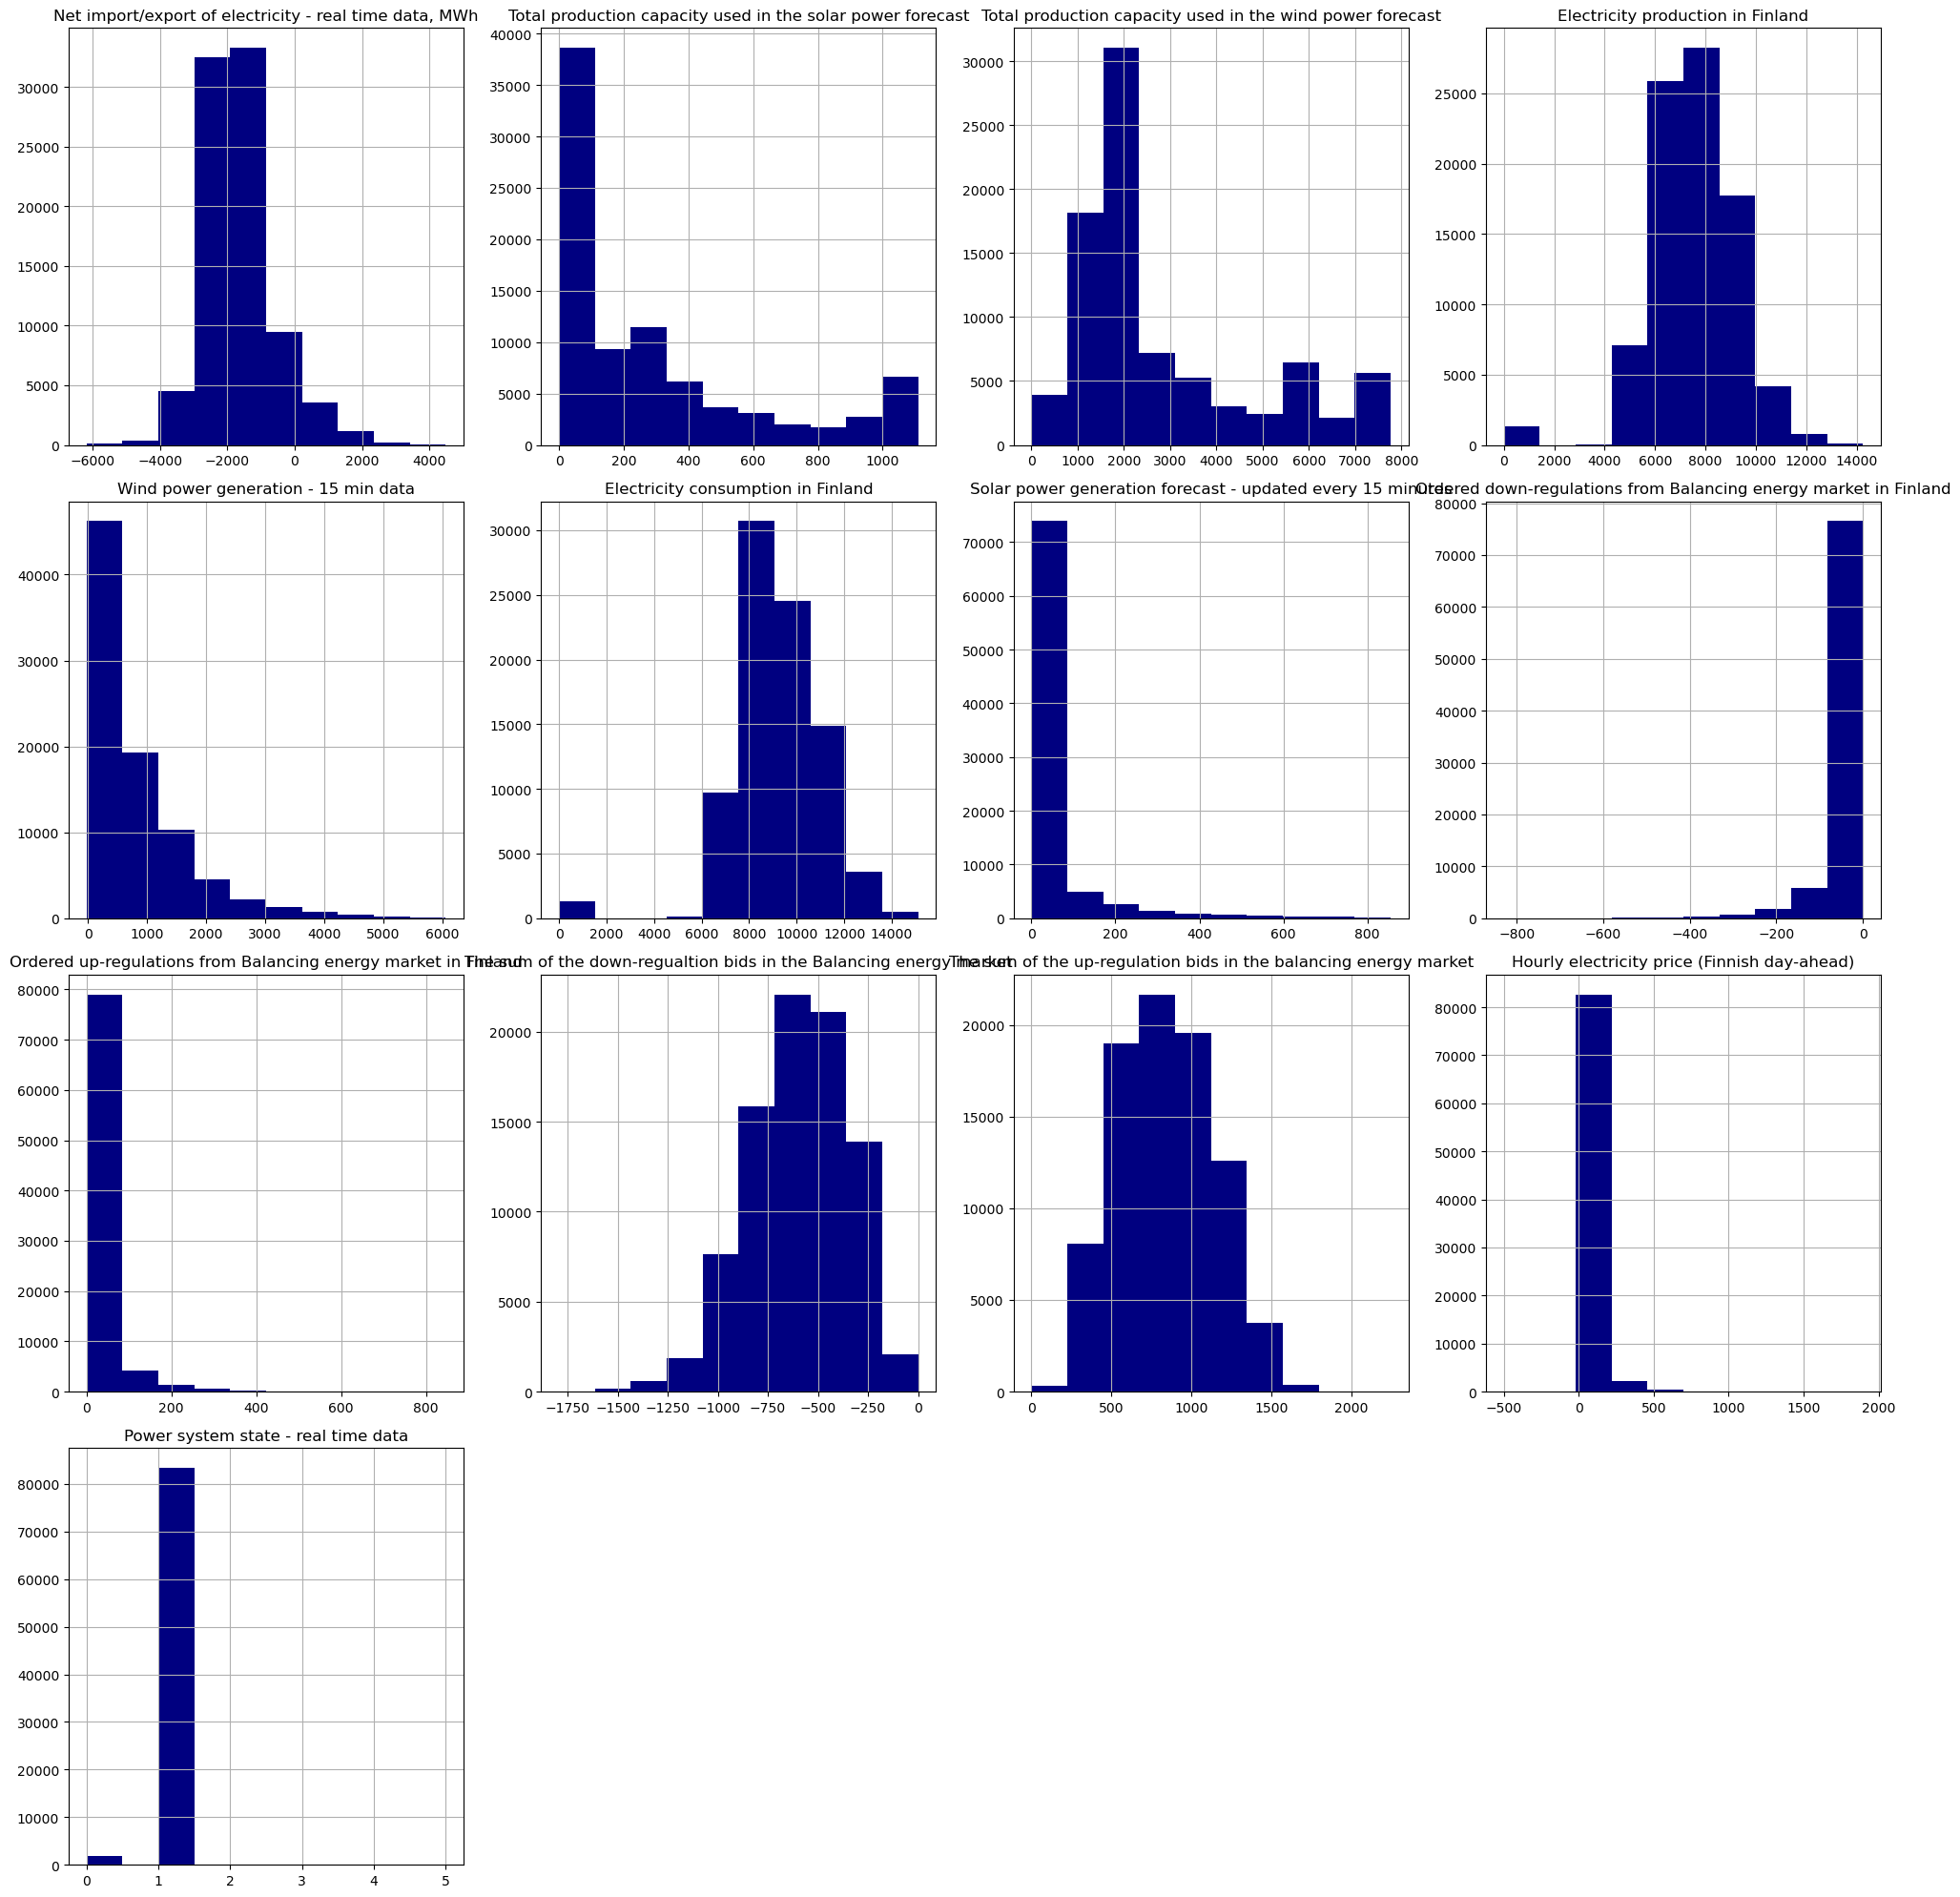

In [30]:
df_filtered_no_date = df_filtered.iloc[:, 1:]

df_filtered_no_date.hist(figsize=(20, 20), color="navy")

plt.tight_layout()
plt.show()

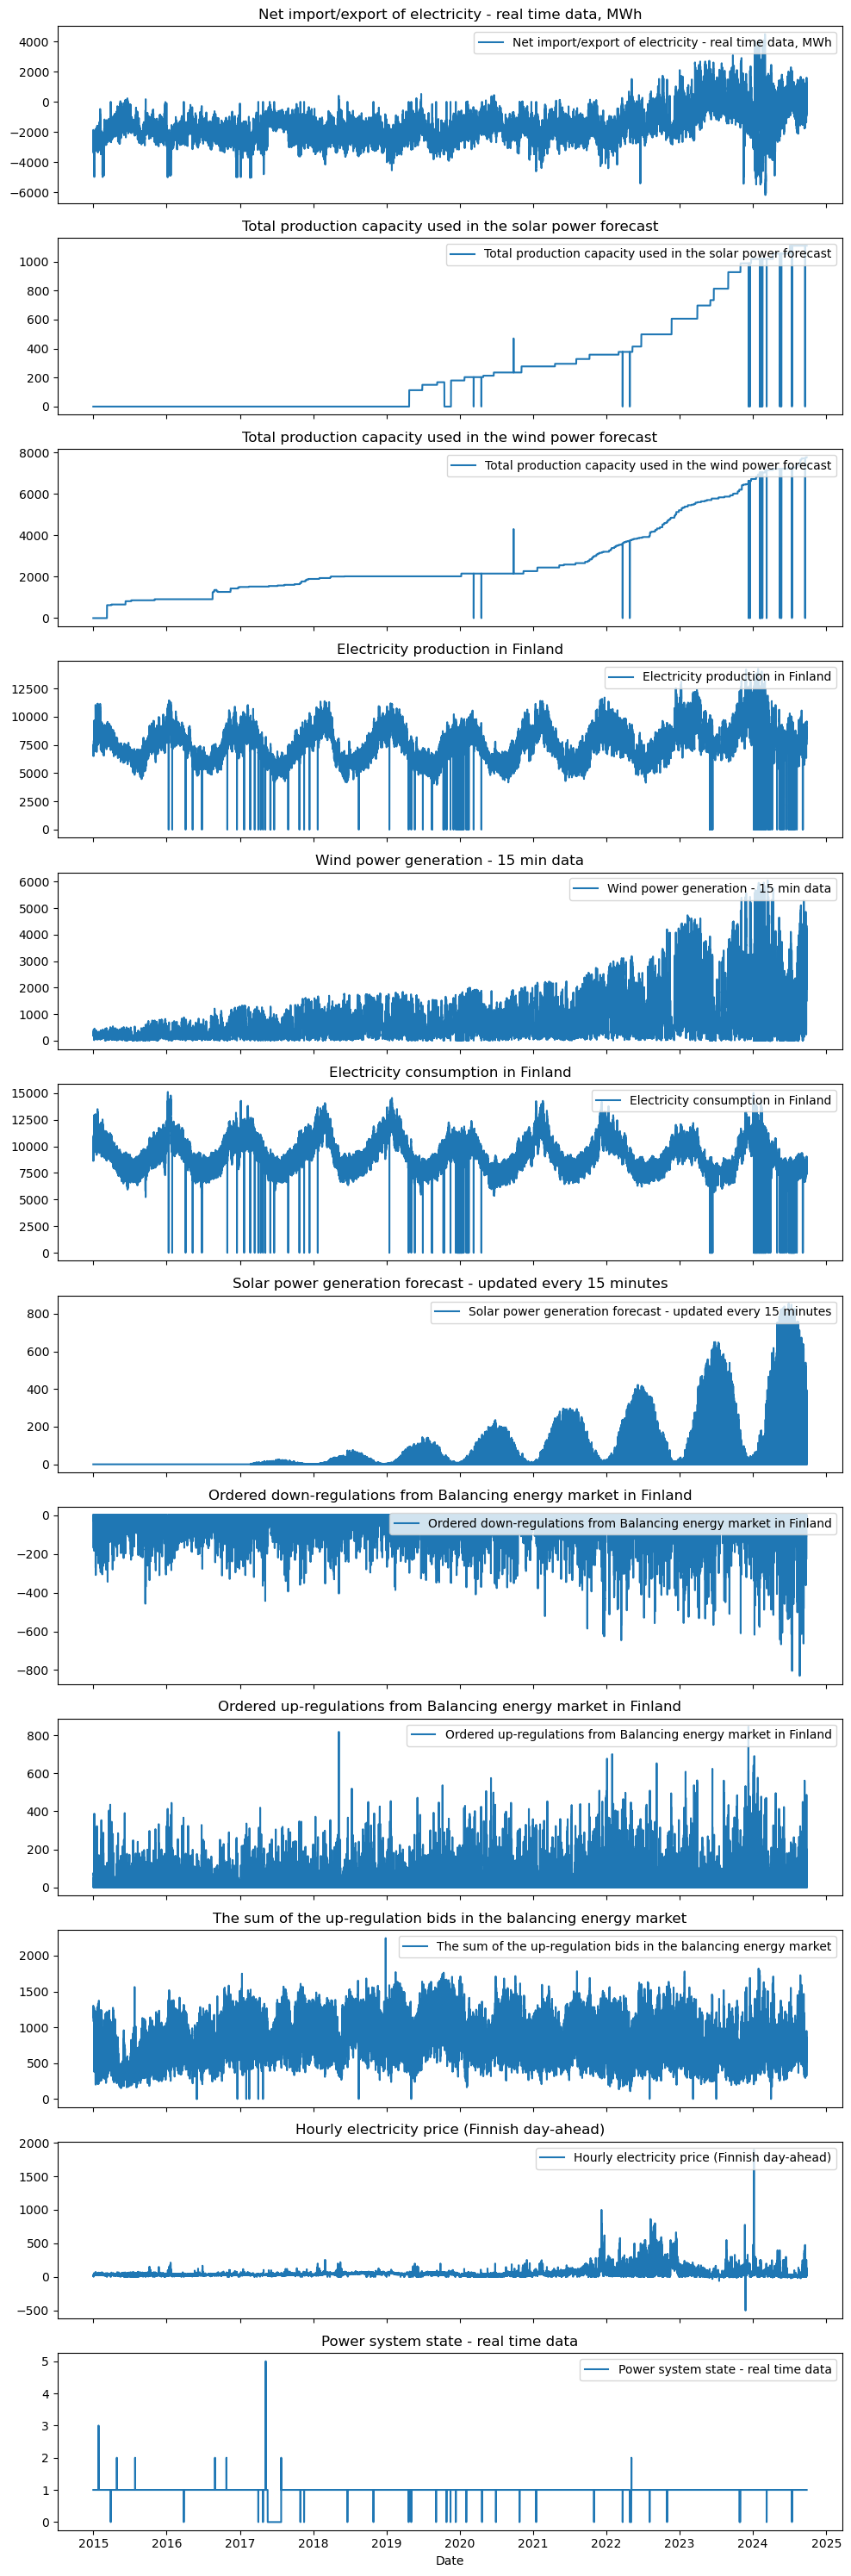

In [31]:
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

variables = [
    'Net import/export of electricity - real time data, MWh',
    'Total production capacity used in the solar power forecast',
    'Total production capacity used in the wind power forecast',
    'Electricity production in Finland',
    'Wind power generation - 15 min data',
    'Electricity consumption in Finland',
    'Solar power generation forecast - updated every 15 minutes',
    'Ordered down-regulations from Balancing energy market in Finland',
    'Ordered up-regulations from Balancing energy market in Finland',
    'The sum of the down-regulation bids in the Balancing energy market',
    'The sum of the up-regulation bids in the balancing energy market',
    'Hourly electricity price (Finnish day-ahead)',
    'Power system state - real time data'
]

available_vars = [var for var in variables if var in df_filtered.columns]

fig, axes = plt.subplots(len(available_vars), 1, figsize=(10, 30), sharex=True)

for i, var in enumerate(available_vars):
    try:
        axes[i].plot(df_filtered['Date'], df_filtered_no_date[var], label=var)
        axes[i].set_title(var)  # Title on top of each graph
        axes[i].legend(loc="upper right")
        # Keep numerical values on y-axis but remove the name of the variable
        axes[i].set_ylabel('')  # Clear y-axis label (only show numbers)
    except Exception as e:
        print(f"Error plotting {var}: {e}")

axes[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()

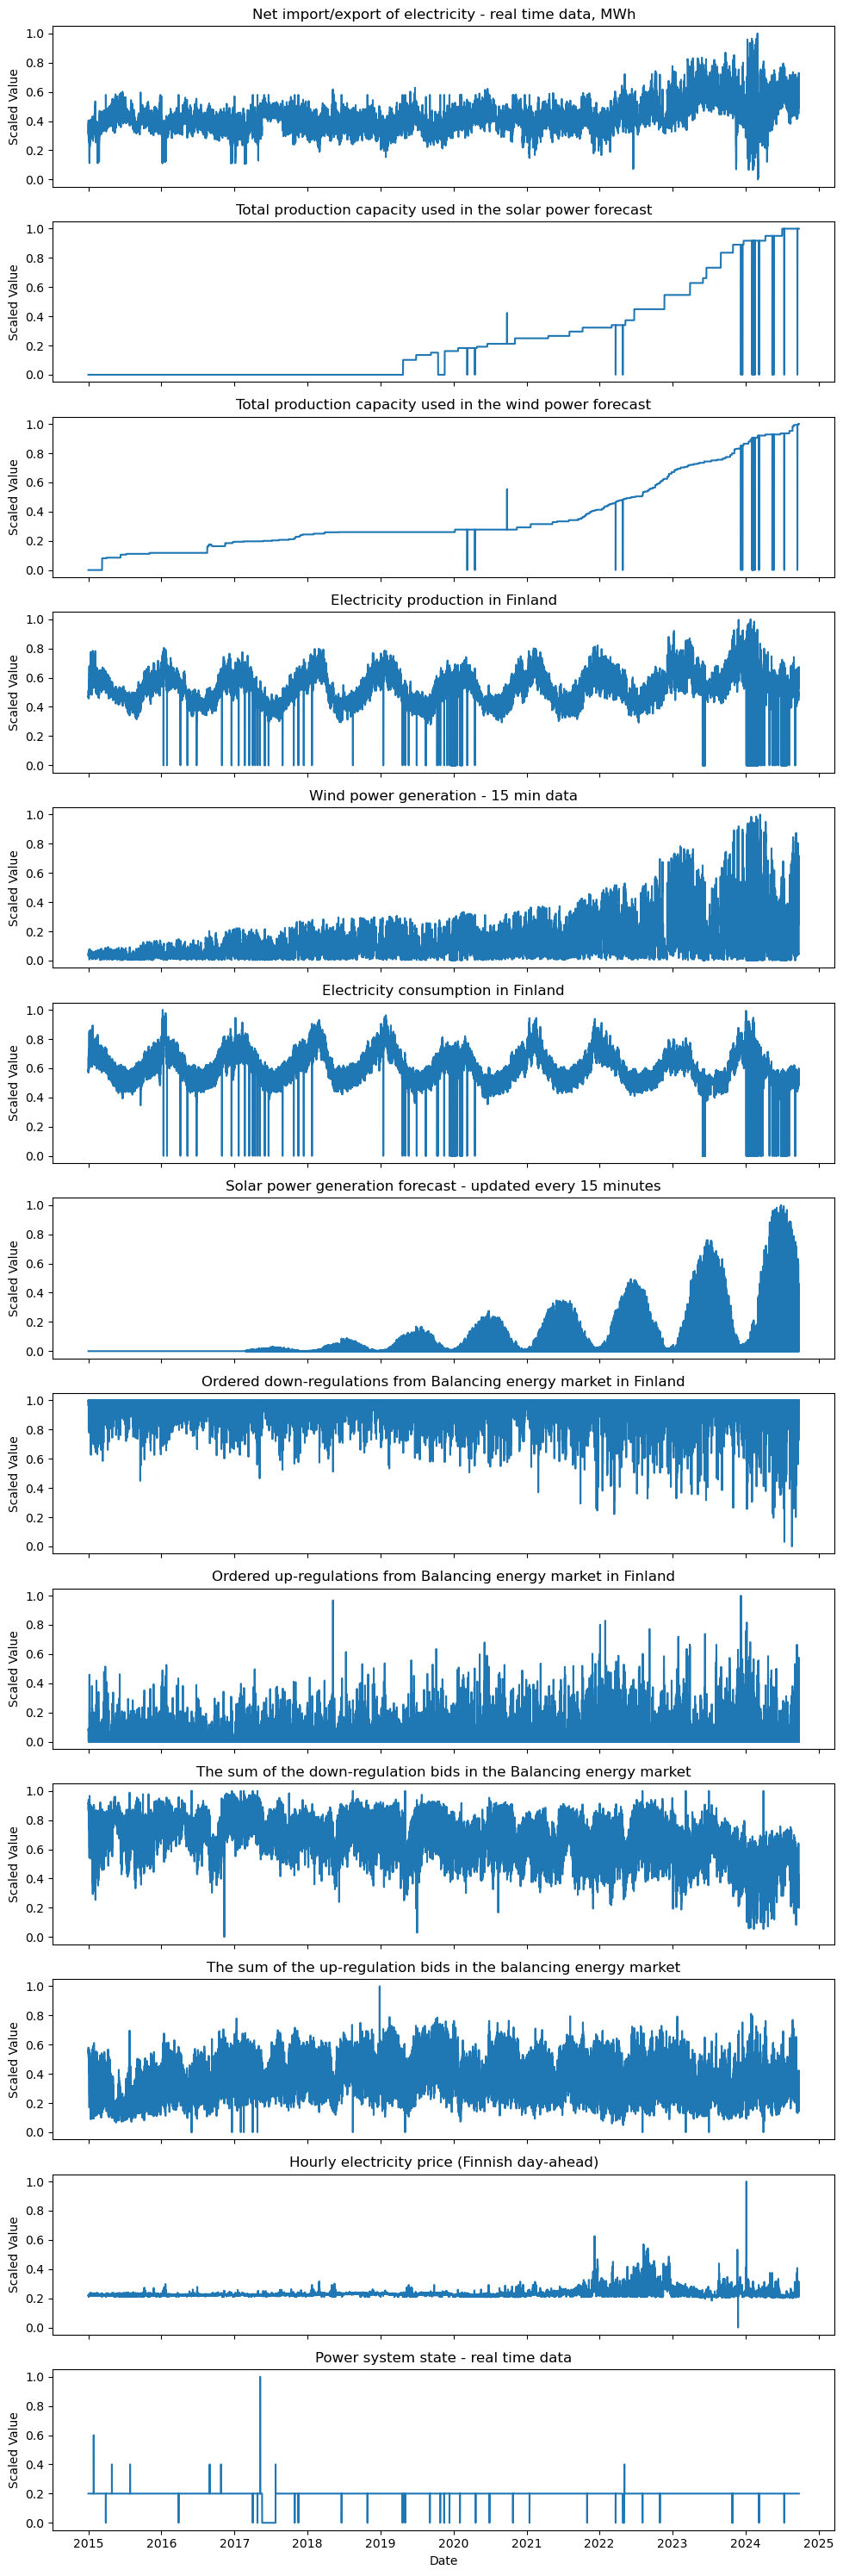

In [32]:
from sklearn.preprocessing import MinMaxScaler
variables = [
    'Net import/export of electricity - real time data, MWh',
    'Total production capacity used in the solar power forecast',
    'Total production capacity used in the wind power forecast',
    'Electricity production in Finland',
    'Wind power generation - 15 min data',
    'Electricity consumption in Finland',
    'Solar power generation forecast - updated every 15 minutes',
    'Ordered down-regulations from Balancing energy market in Finland',
    'Ordered up-regulations from Balancing energy market in Finland',
    'The sum of the down-regulation bids in the Balancing energy market',
    'The sum of the up-regulation bids in the balancing energy market',
    'Hourly electricity price (Finnish day-ahead)',
    'Power system state - real time data'
]

# Initialize MinMaxScaler to scale data between 0 and 1
scaler = MinMaxScaler()

# Scale all variables except the Date column
df_scaled = pd.DataFrame(scaler.fit_transform(df_filtered_no_date), columns=variables)

# Create subplots for each variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 30), sharex=True)

# Plot each variable in a separate subplot
for i, var in enumerate(variables):
    axes[i].plot(df_filtered['Date'], df_scaled[var])
    axes[i].set_title(var)
    axes[i].set_ylabel('Scaled Value')

# Label the x-axis (only once at the bottom)
axes[-1].set_xlabel('Date')

# Adjust layout
plt.tight_layout()
plt.show()